In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import xarray as xr
os.environ['CESMDATAROOT'] = '/glade/scratch/mclong/inputdata'
import pop_tools
import calc

In [3]:
ds_grid = pop_tools.get_grid('POP_gx1v7')

/glade/work/mclong/miniconda3/envs/co2-hole/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


In [4]:
ds = xr.Dataset({
    'SALT': xr.DataArray(35. * np.ones((10, 12, 60, 38, 32)), 
                         dims=('member_id', 'time', 'z_t', 'nlat', 'nlon'),
                         coords={'z_t': ds_grid.z_t},
                        ),
    'TEMP': xr.DataArray(15. * np.ones((10, 12, 60, 38, 32)), 
                         dims=('member_id', 'time', 'z_t', 'nlat', 'nlon'),
                         coords={'z_t': ds_grid.z_t},                         
                        ),
    'KMT': ds_grid.KMT[:38, :32],
}    
)
ds

<xarray.Dataset>
Dimensions:  (member_id: 10, nlat: 38, nlon: 32, time: 12, z_t: 60)
Coordinates:
  * z_t      (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
Dimensions without coordinates: member_id, nlat, nlon, time
Data variables:
    SALT     (member_id, time, z_t, nlat, nlon) float64 35.0 35.0 ... 35.0 35.0
    TEMP     (member_id, time, z_t, nlat, nlon) float64 15.0 15.0 ... 15.0 15.0
    KMT      (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 ... 55 55 56 56 57 57 58 58 58

In [5]:
z_t = ds.SALT.z_t if 'z_t' in ds.SALT.coords else ds.TEMP.z_t
z_t

<xarray.DataArray 'z_t' (z_t: 60)>
array([5.000000e+02, 1.500000e+03, 2.500000e+03, 3.500000e+03, 4.500000e+03,
       5.500000e+03, 6.500000e+03, 7.500000e+03, 8.500000e+03, 9.500000e+03,
       1.050000e+04, 1.150000e+04, 1.250000e+04, 1.350000e+04, 1.450000e+04,
       1.550000e+04, 1.650984e+04, 1.754790e+04, 1.862913e+04, 1.976603e+04,
       2.097114e+04, 2.225783e+04, 2.364088e+04, 2.513702e+04, 2.676542e+04,
       2.854837e+04, 3.051192e+04, 3.268680e+04, 3.510935e+04, 3.782276e+04,
       4.087847e+04, 4.433777e+04, 4.827367e+04, 5.277280e+04, 5.793729e+04,
       6.388626e+04, 7.075633e+04, 7.870025e+04, 8.788252e+04, 9.847059e+04,
       1.106204e+05, 1.244567e+05, 1.400497e+05, 1.573946e+05, 1.764003e+05,
       1.968944e+05, 2.186457e+05, 2.413972e+05, 2.649001e+05, 2.889385e+05,
       3.133405e+05, 3.379794e+05, 3.627670e+05, 3.876452e+05, 4.125768e+05,
       4.375393e+05, 4.625190e+05, 4.875083e+05, 5.125028e+05, 5.375000e+05])
Coordinates:
  * z_t      (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
Attributes:
    units:      cm
    long_name:  depth from surface to midpoint of layer
    positive:   down

In [14]:
mld = calc.mld_dsigma(ds.SALT, ds.TEMP, ds.KMT, dsigma=0.03)

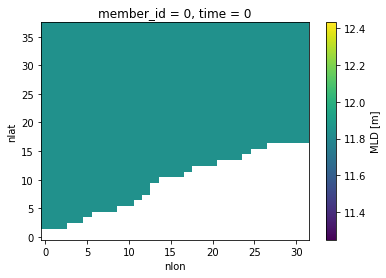

In [13]:
mld.isel(time=0, member_id=0).plot()

In [25]:
ds = xr.Dataset({
    'SALT': xr.DataArray(35. * np.ones((60, 38, 32)), 
                         dims=('z_t', 'nlat', 'nlon'),
                         coords={'z_t': ds_grid.z_t},
                        ),
    'TEMP': xr.DataArray(15. * np.ones((60, 38, 32)), 
                         dims=('z_t', 'nlat', 'nlon'),
                         coords={'z_t': ds_grid.z_t},                         
                        ),
    'KMT': ds_grid.KMT[:38, :32],
}    
)
mld = calc.mld_dsigma(ds.SALT, ds.TEMP, ds.KMT, dsigma=0.03)
mld

<xarray.DataArray 'MLD_03' (nlat: 38, nlon: 32)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [11.84092038, 11.84092038, 11.84092038, ...,         nan,
                nan,         nan],
       ...,
       [11.84092038, 11.84092038, 11.84092038, ..., 11.84092038,
        11.84092038, 11.84092038],
       [11.84092038, 11.84092038, 11.84092038, ..., 11.84092038,
        11.84092038, 11.84092038],
       [11.84092038, 11.84092038, 11.84092038, ..., 11.84092038,
        11.84092038, 11.84092038]])
Coordinates:
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 9 ... 28 29 30 31 32 33 34 35 36 37
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31
Attributes:
    long_name:   MLD
    definition:  $\Delta\sigma = 0.030$
    units:       m

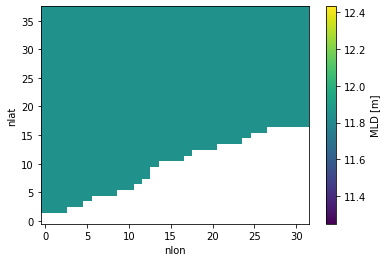

In [26]:
mld.plot()